# Оценки коэффициентов линейной регрессии

In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt

def func(x):
    return 2 + 2 * x

def noiseFunc(x):
    y = []
    for i in x:
        y.append(func(i) + stats.norm.rvs(0, 1))
    return y



In [29]:
def l1_error(params, x, y):
    intercept, slope = params
    return np.sum(np.abs(y - intercept - slope * x))
    
def least_squares_params(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    mean_xy = np.mean(x * y)
    mean_x2 = np.mean(x * x)
    slope = (mean_xy - mean_x * mean_y) / (mean_x2 - mean_x ** 2)
    intercept = mean_y - slope * mean_x
    return intercept, slope

def least_modulus_params(x, y):
    init_intercept, init_slope = least_squares_params(x, y)
    result = opt.minimize(l1_error, [init_intercept, init_slope], args=(x, y), method='SLSQP')
    best_intercept, best_slope = result.x
    return best_intercept, best_slope



## Метод наименьших квадратов и метод наименьших модулей

In [31]:
def MNK(x, y):
    intercept, slope = least_squares_params(x, y)
    print('beta_0 =', intercept, 'beta_1 =', slope)
    y_pred = intercept + slope * x
    return y_pred

def MNM(x, y):
    intercept, slope = least_modulus_params(x, y)
    print('alpha_0 =', intercept, 'alpha_1 =', slope)
    y_pred = intercept + slope * x
    return y_pred

In [33]:
def plotLiRegression(text, x, y):
    y_mnk = MNK(x, y)
    y_mnm = MNM(x, y)
    plt.scatter(x, y, color='gray', marker = ".", linewidths = 0.7)
    plt.plot(x, func(x),  label='Эталон', color='lightcoral')
    plt.plot(x, y_mnk, label="МНК", color='steelblue')
    plt.plot(x, y_mnm, label="МНМ", color='lightgreen')
    plt.xlim([-2, 2])
    #plt.grid()
    plt.legend()
    plt.savefig(text)
    plt.show()

## Невозмущенная выборка

beta_0 = 1.660292378914308 beta_1 = 1.8610314207412126
alpha_0 = 1.567000821543904 alpha_1 = 1.6118952612278474


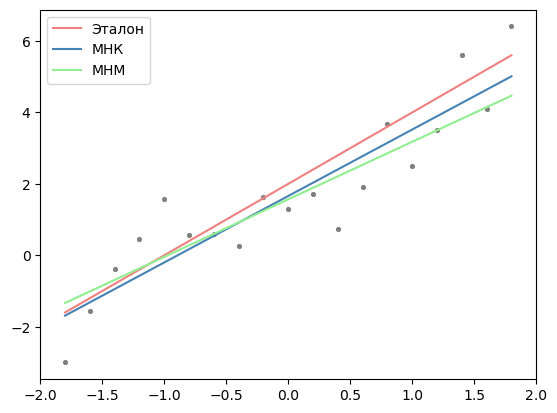

In [37]:
x = np.arange(-1.8, 2, 0.2)
y = noiseFunc(x)
plotLiRegression('Невозмущенная', x, y)
x = np.arange(-1.8, 2, 0.2)

## Возмущенная выборка

beta_0 = 2.036761299820821 beta_1 = 0.3391446185926565
alpha_0 = 2.072405806431999 alpha_1 = 1.6028869253251512


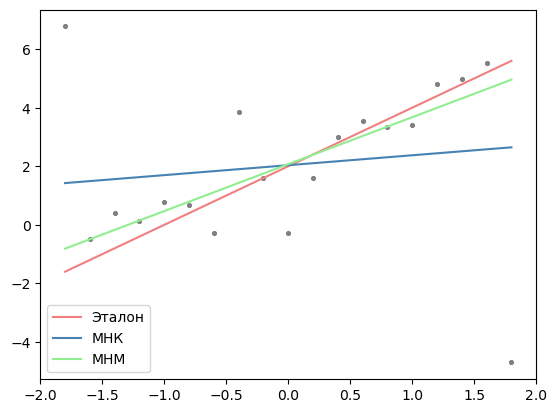

In [39]:
y = noiseFunc(x)
y[0] += 10
y[-1] -= 10
plotLiRegression('Возмущенная', x, y)